# Neural Networks from Scratch
https://nnfs.io/order


### A Single Neuron

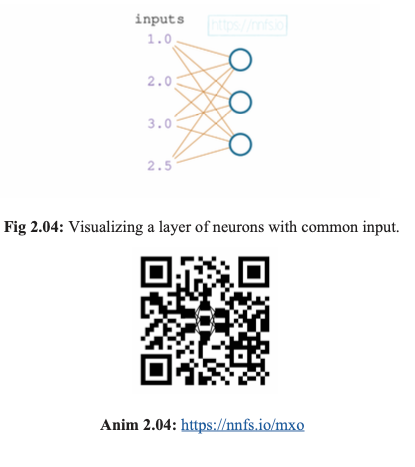

In [1]:
inputs = [1.0, 2.0, 3.0, 2.5] # could be features of a data observation
weights = [0.2, 0.8, -0.5, 1.0] # randomly initialized weights
bias = 2.0 # randomly initialized bias

output = (
    inputs[0] * weights[0] +
    inputs[1] * weights[1] +
    inputs[2] * weights[2] +
    inputs[3] * weights[3] + bias
)

print(output) # 4.8

#       ----- Animations -----
# Single neuron with 3 inputs example
# https://nnfs.io/bkr/

# A single neuron with 4 inputs
# https://nnfs.io/djp/

4.8


<div class="alert alert-block alert-danger">
<b>Why do we include a bias? What happens if bias = 0?</b>
</div>

### A Layer of Neurons

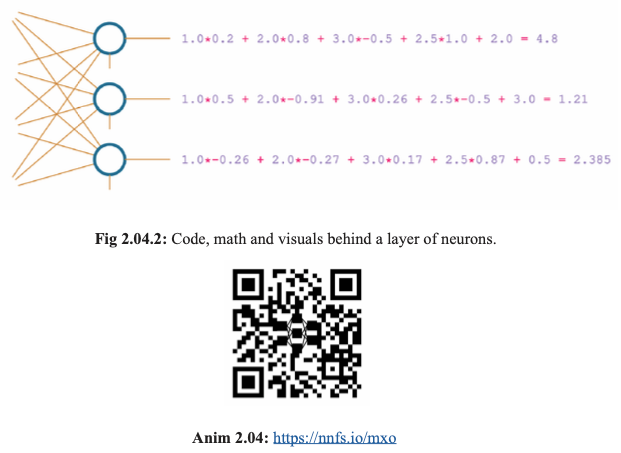

In [ ]:
inputs = [1.0, 2.0, 3.0, 2.5] # 4 input features

weights1 = [0.2, 0.8, -0.5, 1.0] # Weights for neuron 1
weights2 = [0.5, -0.91, 0.26, -0.5] # Weights for neuron 2
weights3 = [-0.26, -0.27, 0.17, 0.87] # Weights for neuron 3

# Biases for each neuron
bias1 = 2.0 
bias2 = 3.0
bias3 = 0.5

# Output of current layer
outputs = [
    # Neuron 1:
    inputs[0] * weights1[0] +
    inputs[1] * weights1[1] +
    inputs[2] * weights1[2] +
    inputs[3] * weights1[3] + bias1,

    # Neuron 2:
    inputs[0] * weights2[0] +
    inputs[1] * weights2[1] +
    inputs[2] * weights2[2] +
    inputs[3] * weights2[3] + bias2,
    
    # Neuron 3:
    inputs[0] * weights3[0] +
    inputs[1] * weights3[1] +
    inputs[2] * weights3[2] +
    inputs[3] * weights3[3] + bias3,
]

print(outputs)

# ------------------------------------------
#           For Loop Method

# inputs and weights
inputs = [1.0, 2.0, 3.0, 2.5]
weights = [
    [0.2, 0.8, -0.5, 1.0],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
]
biases = [2.0, 3.0, 0.5]

# Output of current layer
layer_outputs = []
# For each neuron
for neuron_weights, neuron_bias in zip(weights, biases):
    # Zeroed output of given neuron
    neuron_output = 0

    # For each input and weight to the neuron
    for n_input, weight in zip(inputs, neuron_weights):
        # Multiply this input by associated weight
        # and add to the neuron's output variable
        neuron_output += n_input * weight
    
    # Add bias
    neuron_output += neuron_bias
    # Put neuron's result to the layer's output list
    layer_outputs.append(neuron_output)

print(layer_outputs)

#       ----- Animations -----
# 3 neuron layer with 4 inputs
# https://nnfs.io/mxo/


[4.8, 1.21, 2.385]
[4.8, 1.21, 2.385]


<div class="alert alert-block alert-danger">
<b>Could two different (weights, bias) settings produce the same output for all inputs?</b>
</div>

### Tensors, Arrays, Vectors

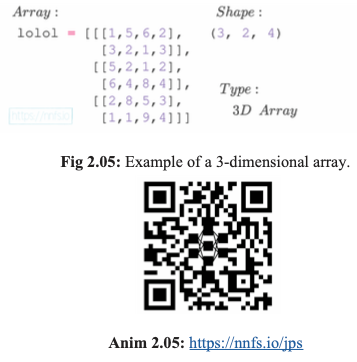

In [ ]:
# List (1D array, Vector) - Shape is (4,) - 4 elements, 1 dimension.
l = [1, 5, 6, 2]

# List of lists (2D array, Matrix) - Shape is (2, 4) - 2 lists, 4 elements. 2 dimension.
lol = [[1, 5, 6, 2], [3, 2, 1, 3]] 

# List of lists of lists (3D array) - Shape is (3, 2, 4) - 3 lists of lists, 2 lists per list, 4 elements per list, 3 dimensions.
lolol = [
    [[1, 5, 6, 2], [3, 2, 1, 3]],
    [[5, 2, 1, 2], [6, 4, 8, 4]],
    [[2, 8, 5, 3], [1, 1, 9, 4]]
]

# This list cannot be an array due it not being "homologous" (having the same relation, relative position, or structure)
another_list_of_lists = [[4, 2, 3], [5, 1]]


# Matrix (2D array) - Shape is (3, 2), 3 lists, 2 elements per list. 2 dimensions.
list_matrix_array = [[4, 2],
                     [5, 1],
                     [8, 2]]

#       ----- Animations -----
# Arrays and their shapes
# https://nnfs.io/jps/

<div class="alert alert-block alert-danger">
<b>Why use tensors? why not just numpy arrays?</b>
</div>

### A Single Neuron with NumPy



In [ ]:
import numpy as np


# Single neuron, 4 inputs
inputs = [1.0, 2.0, 3.0, 2.5]
weights = [0.2, 0.8, -0.5, 1.0]
bias = 2.0

# Calculate output with numpy
outputs = np.dot(weights, inputs) + bias
outputs_numpy_hardcoded_no_bias = np.dot([0.2, 0.8, -0.5, 1.0], [1.0, 2.0, 3.0, 2.5])
outputs_numpy_hardcoded_with_bias = np.dot([0.2, 0.8, -0.5, 1.0], [1.0, 2.0, 3.0, 2.5]) + bias

print(outputs) # 4.8
print(outputs_numpy_hardcoded_no_bias) # 2.8
print(outputs_numpy_hardcoded_with_bias) # 4.8


print("-----")


# with no numpy
outputs_hardcoded_no_bias = 0.2 * 1.0 + 0.8 * 2.0 + -0.5 * 3.0 + 1.0 * 2.5
outputs_hardcoded_with_bias = 0.2 * 1.0 + 0.8 * 2.0 + -0.5 * 3.0 + 1.0 * 2.5 + 2.0

print(outputs_hardcoded_no_bias) # 2.8
print(outputs_hardcoded_with_bias) # 4.8


#       ----- Animations -----
# Using the dot product for a neuron's calculation
# https://nnfs.io/blq/


4.8
2.8
4.8
-----
2.8
4.8


### A Layer of Neurons with NumPy

In [3]:
import numpy as np

# Output of a layer of 3 neurons. 4 inputs from the previous layer.

inputs = [1.0, 2.0, 3.0, 2.5]
weights = [
    [0.2, 0.8, -0.5, 1.0],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
]
biases = [2.0, 3.0, 0.5]

outputs = np.dot(weights, inputs) + biases

print(outputs)
print("----")

outputs_hardcoded = np.array([np.dot(weights[0], inputs), np.dot(weights[1], inputs), np.dot(weights[2], inputs)])
outputs_hardcoded_with_biases = np.array([np.dot(weights[0], inputs), np.dot(weights[1], inputs), np.dot(weights[2], inputs)]) + biases


print(outputs_hardcoded)
print(outputs_hardcoded_with_biases)


#       ----- Animations -----
# Using the dot product with a layer of neurons
# https://nnfs.io/cyx/

[4.8   1.21  2.385]
----
[ 2.8   -1.79   1.885]
[4.8   1.21  2.385]


### A batch of data

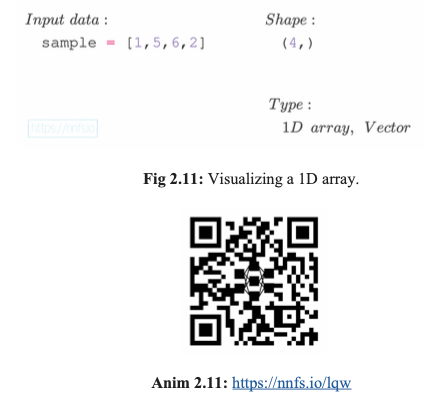

In [ ]:
# List (1D Array, Vector) - Shape (4,)
sample = [1, 5, 6, 2]

# List of lists (2D Array, Matrix) - Shape (8, 4)
batch = [[1, 5, 6, 2],
         [3, 2, 1, 3],
         [5, 2, 1, 2],
         [6, 4, 8, 4],
         [2, 8, 5, 3],
         [1, 1, 9, 4],
         [6, 6, 0, 4],
         [8, 7, 6, 4]]

inputs = [[1.0, 2.0, 3.0, 2.5], 
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]]


#       ----- Animations -----
# Example of what an array of a batch of samples looks like, compared to a single sample.
# https://nnfs.io/lqw/

# How batches can help with fitment
# https://nnfs.io/vyu/

<div class="alert alert-block alert-danger">
<b>What are the advantages of batches?</b>
</div>

Answer:

Efficiency: Instead of doing one forward/backward pass per sample (slow), you pass multiple at once. Better for GPUs

Stable gradients: A single sample gives a noisy estimate of the gradient. A batch averages across several samples so you get smoother updates

Memory trade-off: Bigger batch = more memory needed. Small batch = more updates per epoch but noisier training

### Matrix Product

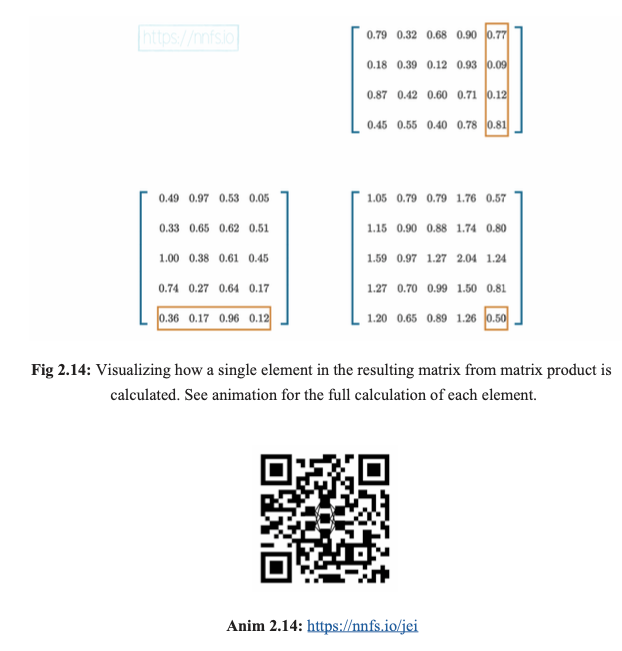

In [ ]:
import numpy as np

# create 2 matrices
matrix_a = [[0.49, 0.97, 0.53, 0.05],
            [0.33, 0.65, 0.62, 0.51],
            [1.00, 0.38, 0.61, 0.45],
            [0.74, 0.27, 0.64, 0.17],
            [0.36, 0.17, 0.96, 0.12]]

matrix_b = [[0.79, 0.32, 0.68, 0.90, 0.77],
            [0.18, 0.39, 0.12, 0.93, 0.09],
            [0.87, 0.42, 0.60, 0.71, 0.12],
            [0.45, 0.55, 0.40, 0.78, 0.81]]


# Manual Implementation of Matrix Multiplication 
matrix_product_results = []
products = []

for vector in matrix_a:
    col = 0
    
    while col <= len(matrix_b[0]) - 1:
        product = 0
        row = 0
        for val in vector:
            product += val * matrix_b[row][col]
            row += 1

        products.append(product)
        col += 1

    matrix_product_results.append(list(products))
    products.clear()

print("My algorithm: ")
matrix_product_results = np.round(np.array(matrix_product_results), 2)
print(matrix_product_results)

print("\n ---------------------------- \n")


print("NumPy: ")
numpy_matrix_product_result = np.round(np.dot(matrix_a, matrix_b), 2)
print(numpy_matrix_product_result)


#       ----- Animations -----
# How a matrix product is calculated
# https://nnfs.io/jei/

# Matrix product with row and column vectors
# https://nnfs.io/bkw/

My algorithm: 
[[1.05 0.79 0.79 1.76 0.57]
 [1.15 0.9  0.88 1.74 0.8 ]
 [1.59 0.97 1.27 2.04 1.24]
 [1.27 0.7  0.99 1.5  0.81]
 [1.2  0.65 0.89 1.26 0.5 ]]

 ---------------------------- 

NumPy: 
[[1.05 0.79 0.79 1.76 0.57]
 [1.15 0.9  0.88 1.74 0.8 ]
 [1.59 0.97 1.27 2.04 1.24]
 [1.27 0.7  0.99 1.5  0.81]
 [1.2  0.65 0.89 1.26 0.5 ]]


### Transposition for the Matrix Product

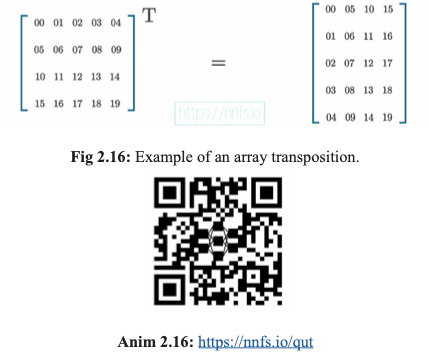

In [ ]:
import numpy as np

# Matrix product on a row vector and column vector
d = [1, 2, 3]
e = [2, 3, 4]

d = np.array([d])
e = np.array([e]).T # Numpy Matrix Transposition

# Outputs single value in a matrix

print(d.shape, e.shape)
print(np.dot(d, e)) 


matrix = [[0.49, 0.97, 0.53, 0.05],
            [0.33, 0.65, 0.62, 0.51],
            [1.00, 0.38, 0.61, 0.45],
            [0.74, 0.27, 0.64, 0.17],
            [0.36, 0.17, 0.96, 0.12]]


# Transpose the matrix
transposed_matrix = np.array(matrix).T

print(np.array(matrix).shape)
print(matrix)
print(transposed_matrix.shape)
print(transposed_matrix)

#       ----- Animations -----
# How a transpose works
# https://nnfs.io/qut/

# How a tranpose/transposition works
# https://nnfs.io/pnq/

(1, 3) (3, 1)
[[20]]
(5, 4)
[[0.49, 0.97, 0.53, 0.05], [0.33, 0.65, 0.62, 0.51], [1.0, 0.38, 0.61, 0.45], [0.74, 0.27, 0.64, 0.17], [0.36, 0.17, 0.96, 0.12]]
(4, 5)
[[0.49 0.33 1.   0.74 0.36]
 [0.97 0.65 0.38 0.27 0.17]
 [0.53 0.62 0.61 0.64 0.96]
 [0.05 0.51 0.45 0.17 0.12]]


### A layer of neurons with a batch of data

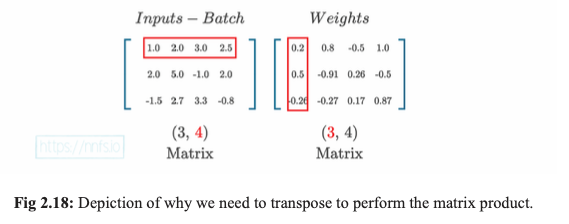

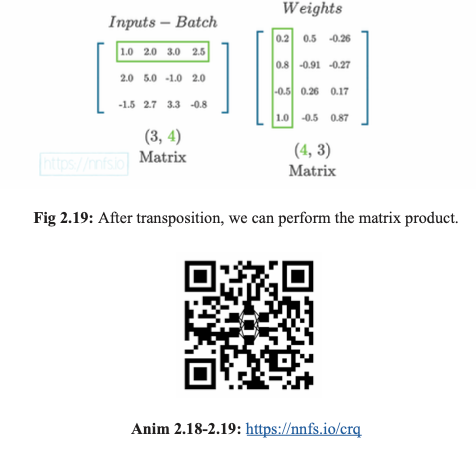

### Adding Layers

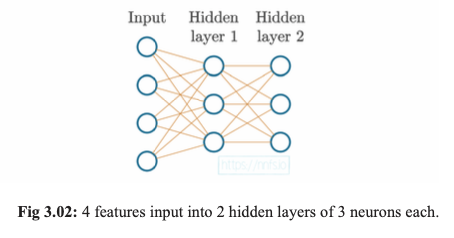

In [20]:
import numpy as np

"""
Input Layer   ---   Hidden Layer 1   ---   Hidden Layer 2

 4 Neurons    ->     3 Neurons        ->     3 Neurons
"""

# 4 Neurons
inputs = [[1.0, 2.0, 3.0, 2.5], # Neuron 1 in Hidden Layer 1 will be receiving input data from 4 neurons
          [2.0, 5.0, -1.0, 2.0], # Neuron 2 in Hidden Layer 1 will be receiving input data from 4 neurons
          [-1.5, 2.7, 3.3, -0.8]] # Neuron 3 in Hidden Layer 1 will be receiving input data from 4 neurons

weights = [[0.2, 0.8, -0.5, 1.0], # Neuron 1 in Hidden Layer 1 weights 
           [0.5, -0.91, 0.26, -0.5], # Neuron 2 in Hidden Layer 1 weights
           [-0.26, -0.27, 0.17, 0.87]] # Neuron 3 in Hidden Layer 1 weights

biases = [2, 3, 0.5] # Neurons 1 -> 3 in Hidden Layer 1 biases

layer1_outputs = np.dot(inputs, np.array(weights).T) + biases
print(layer1_outputs) 

print("----")

""" 
Hidden Layer 1 Outputs:

[[ 4.8    1.21   2.385] # Neuron 1 in Hidden Layer 2 will be receiving output data from 3 neurons in Hidden Layer 1
[ 8.9   -1.81   0.2  ] # Neuron 2 in Hidden Layer 2 will be receiving output data from 3 neurons in Hidden Layer 1
[ 1.41   1.051  0.026]] # Neuron 3 in Hidden Layer 2 will be receiving output data from 3 neurons in Hidden Layer 1
"""

weights2 = [[0.1, -0.14, 0.5], # Neuron 1 in Hidden Layer 2 weights 
            [-0.5, 0.12, -0.33], # Neuron 2 in Hidden Layer 2 weights
            [-0.44, 0.73, -0.13]] # Neuron 3 in Hidden Layer 2 weights

biases2 = [-1, 2, -0.5] # Neurons 1 -> 3 in Hidden Layer 2 biases

layer2_outputs = np.dot(layer1_outputs, np.array(weights2).T) + biases2
print(layer2_outputs)

""" 
Hidden Layer 2 Outputs:

[[ 0.5031  -1.04185 -2.03875]
[ 0.2434  -2.7332  -5.7633 ]
[-0.99314  1.41254 -0.35655]]
"""

[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]
----
[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


' \nHidden Layer 2 Outputs:\n\n[[ 0.5031  -1.04185 -2.03875]\n[ 0.2434  -2.7332  -5.7633 ]\n[-0.99314  1.41254 -0.35655]]\n'

<div class="alert alert-block alert-danger">
<b>After the first layer, the output layer1_outputs has shape (3,3). What does each dimension mean?</b>
</div>

### Training Data
Next class, we will train the NN to predict this!

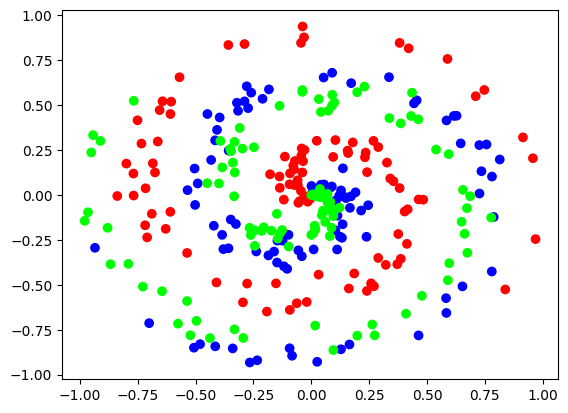

In [11]:
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt
import numpy as np
import nnfs


nnfs.init()

X, y = spiral_data(samples=100, classes=3)

# x axis = X[:, 0]
# y axis = X[:, 1]
# y = classes

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="brg")
plt.show()

### A Dense Layer Class

In [12]:
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt
import numpy as np
import nnfs

nnfs.init()


# Dense layer
class Layer_Dense:
    # Layer Initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward Pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases


# Create dataset
X, y = spiral_data(samples=100, classes=3)

# First few samples
# print(X[:5])

# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)

# Perform a foward pass of our training data through this layer
dense1.forward(X)

# Let's see output of the first few samples:
# print(dense1.output[:5])

print("Weights not Transposed:")
print(dense1.weights[:5], "\n")

print("Weights Transposed:")
print(dense1.weights[:5].T, "\n")

Weights not Transposed:
[[-0.01306527  0.01658131 -0.00118164]
 [-0.00680178  0.00666383 -0.0046072 ]] 

Weights Transposed:
[[-0.01306527 -0.00680178]
 [ 0.01658131  0.00666383]
 [-0.00118164 -0.0046072 ]] 



<div class="alert alert-block alert-danger">
<b>why make this a class?</b>
</div>

### ReLU Activation Function

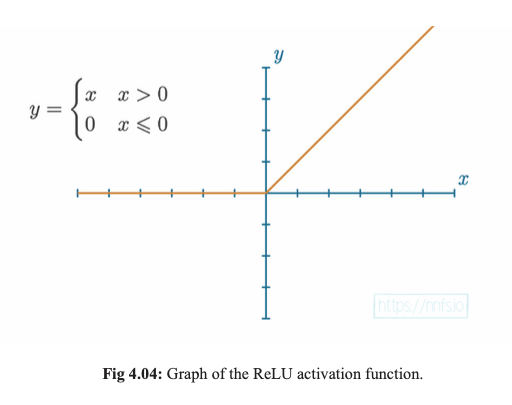

In [13]:
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt
import numpy as np
import nnfs

nnfs.init()


# Dense layer
class Layer_Dense:
    # Layer Initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward Pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases


# ReLU activation
class Activation_ReLU:
    # Forward pass
    def forward(self, inputs):
        # Calculate output values from input
        self.output = np.maximum(0, inputs)

# Create dataset
X, y = spiral_data(samples=100, classes=3)

# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)

# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()

# Perform a foward pass of our training data through this layer
dense1.forward(X)

# Forward pass through the activation function.
# Takes in output from previous Dense layer.
activation1.forward(dense1.output)

# Let's see output of the first few samples:
print(activation1.output[:5])

[[0.         0.         0.        ]
 [0.         0.00011395 0.        ]
 [0.         0.00031729 0.        ]
 [0.         0.00052666 0.        ]
 [0.         0.00071401 0.        ]]


#### Why use activation functions? 

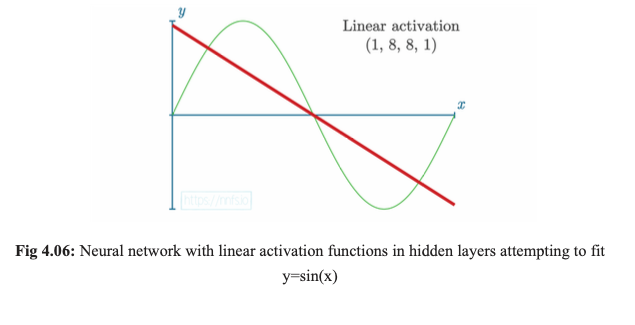

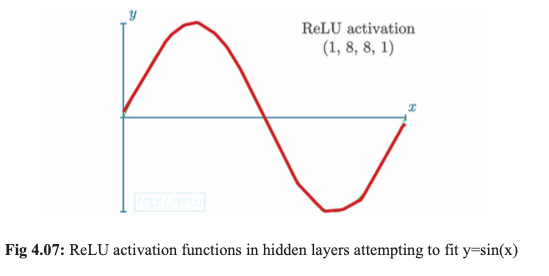

https://nnfs.io/mvp/

### Softmax activation function

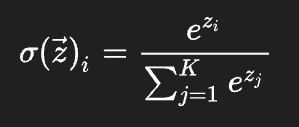

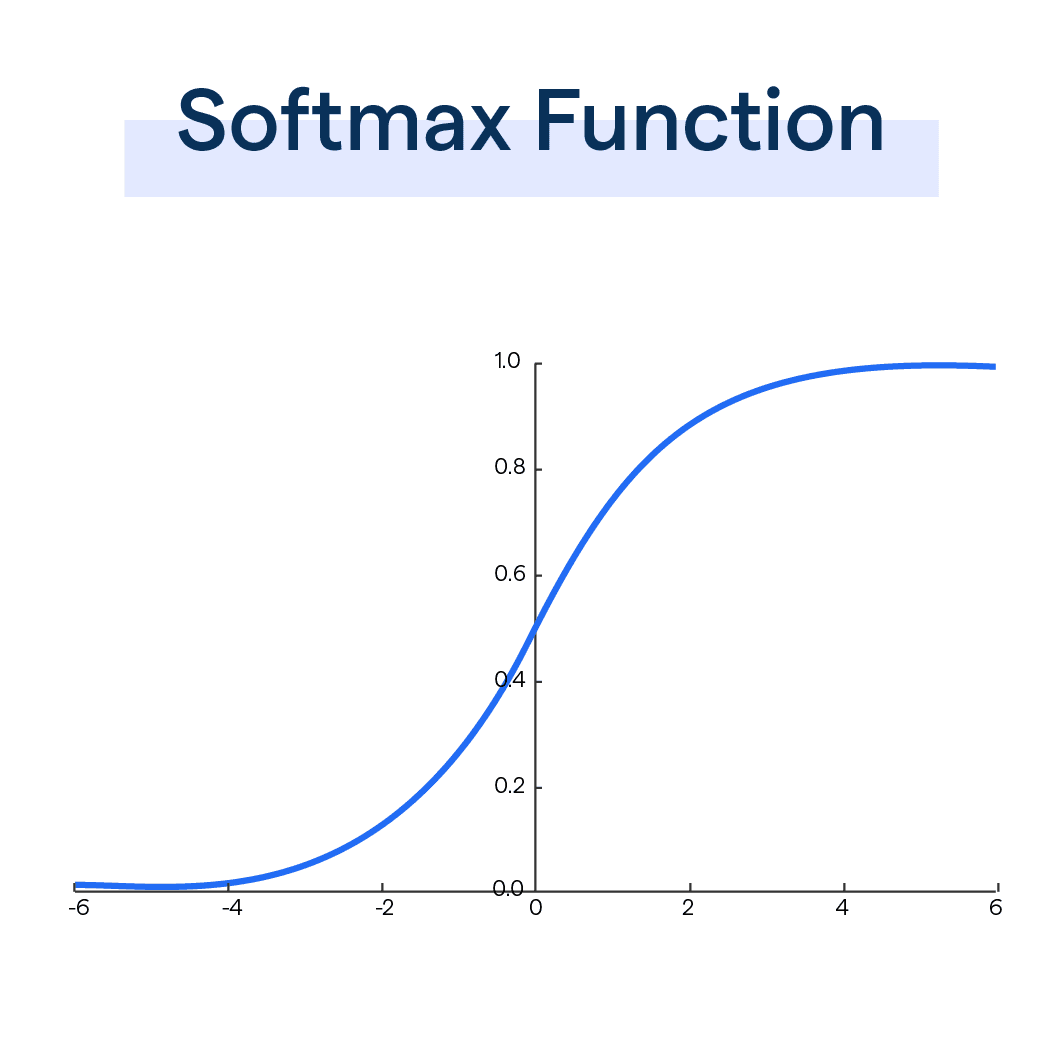

In [18]:
# example

layer_outputs = [ 4.8 , 1.21 , 2.385 ]

# Get unnormalized probabilities
exp_values = np.exp(layer_outputs)
# Normalize them for each sample
probabilities = exp_values / np.sum(exp_values, axis = 0 , keepdims = True )

print(probabilities)
print(np.sum(probabilities)) # 1.0


[0.89528266 0.02470831 0.08000903]
0.9999999999999999


In [14]:
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt
import numpy as np
import nnfs

nnfs.init()


# Dense layer
class Layer_Dense:
    # Layer Initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward Pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

# ReLU activation
class Activation_ReLU:
    # Forward pass
    def forward(self, inputs):
        # Calculate output values from input
        self.output = np.maximum(0, inputs)

# Softmax activation
class Activation_Softmax:
    # Forward pass
    def forward(self, inputs):
        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))

        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)

        self.output = probabilities

# Create dataset
X, y = spiral_data(samples=100, classes=3)

# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)

# Create ReLU activation (to be used with Dense layer 1):
activation1 = Activation_ReLU()

# Create second Dense layer with 3 input features (as we take output
# of previous Dense layer here) and 3 output values
dense2 = Layer_Dense(3, 3)

# Create Softmax activation (to be used with Dense layer 2):
activation2 = Activation_Softmax()

# Perform a forward pass of our training data through this layer
dense1.forward(X)

# Forward pass through the activation function.
# It takes the output of the first Dense layer here.
activation1.forward(dense1.output)

# Make a forward pass through second Dense layer.
# It takes the outputs of the activation function of the first Dense layer as inputs.
dense2.forward(activation1.output)

# Make a forward pass through the activation function.
# It takes the output of the second Dense layer here.
activation2.forward(dense2.output)


# Let's see output of the first few samples:
print(activation2.output[:5])

[[0.33333334 0.33333334 0.33333334]
 [0.33333316 0.3333332  0.33333364]
 [0.33333287 0.3333329  0.33333418]
 [0.3333326  0.33333263 0.33333477]
 [0.33333233 0.3333324  0.33333528]]


### Categorical Cross Entropy Loss Class

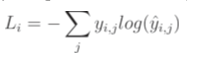

<div class="alert alert-block alert-danger">
<b>What is the purpose of a loss function?</b>
</div>

In [15]:
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt
import numpy as np
import nnfs

nnfs.init()


# Dense layer
class Layer_Dense:
    # Layer Initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward Pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

# ReLU activation
class Activation_ReLU:
    # Forward pass
    def forward(self, inputs):
        # Calculate output values from input
        self.output = np.maximum(0, inputs)

# Softmax activation
class Activation_Softmax:
    # Forward pass
    def forward(self, inputs):
        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))

        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)

        self.output = probabilities

# Common loss class
class Loss:

    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):

        # Calculate sample losses
        sample_losses = self.forward(output, y)

        # Calculate mean loss
        data_loss = np.mean(sample_losses)

        # Return loss
        return data_loss


# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):

    # Forward pass
    def forward(self, y_pred, y_true):

        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Probabilities for target values - only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]
        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )
        
        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)

        return negative_log_likelihoods

# Create dataset
X, y = spiral_data(samples=100, classes=3)

# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)

# Create ReLU activation (to be used with Dense layer 1):
activation1 = Activation_ReLU()

# Create second Dense layer with 3 input features (as we take output
# of previous Dense layer here) and 3 output values
dense2 = Layer_Dense(3, 3)

# Create Softmax activation (to be used with Dense layer 2):
activation2 = Activation_Softmax()

# Create loss function
loss_function = Loss_CategoricalCrossentropy()

# Perform a forward pass of our training data through this layer
dense1.forward(X)

# Forward pass through the activation function.
# It takes the output of the first Dense layer here.
activation1.forward(dense1.output)

# Make a forward pass through second Dense layer.
# It takes the outputs of the activation function of the first Dense layer as inputs.
dense2.forward(activation1.output)

# Make a forward pass through the activation function.
# It takes the output of the second Dense layer here.
activation2.forward(dense2.output)


# Let's see output of the first few samples:
print(activation2.output[:5])

# Perform a forward pass through activation function
# it takes the output of a second dense layer here and returns loss
loss = loss_function.calculate(activation2.output, y)

# Print loss value
print("loss: ", loss) # 1.0986104

[[0.33333334 0.33333334 0.33333334]
 [0.33333316 0.3333332  0.33333364]
 [0.33333287 0.3333329  0.33333418]
 [0.3333326  0.33333263 0.33333477]
 [0.33333233 0.3333324  0.33333528]]
loss:  1.0986104


### Accuracy Calculation

In [16]:
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt
import numpy as np
import nnfs

nnfs.init()


# Dense layer
class Layer_Dense:
    # Layer Initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward Pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

# ReLU activation
class Activation_ReLU:
    # Forward pass
    def forward(self, inputs):
        # Calculate output values from input
        self.output = np.maximum(0, inputs)

# Softmax activation
class Activation_Softmax:
    # Forward pass
    def forward(self, inputs):
        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))

        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)

        self.output = probabilities

# Common loss class
class Loss:

    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):

        # Calculate sample losses
        sample_losses = self.forward(output, y)

        # Calculate mean loss
        data_loss = np.mean(sample_losses)

        # Return loss
        return data_loss


# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):

    # Forward pass
    def forward(self, y_pred, y_true):

        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Probabilities for target values - only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]
        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )
        
        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)

        return negative_log_likelihoods

# Create dataset
X, y = spiral_data(samples=100, classes=3)

# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)

# Create ReLU activation (to be used with Dense layer 1):
activation1 = Activation_ReLU()

# Create second Dense layer with 3 input features (as we take output
# of previous Dense layer here) and 3 output values
dense2 = Layer_Dense(3, 3)

# Create Softmax activation (to be used with Dense layer 2):
activation2 = Activation_Softmax()

# Create loss function
loss_function = Loss_CategoricalCrossentropy()

# Perform a forward pass of our training data through this layer
dense1.forward(X)

# Forward pass through the activation function.
# It takes the output of the first Dense layer here.
activation1.forward(dense1.output)

# Make a forward pass through second Dense layer.
# It takes the outputs of the activation function of the first Dense layer as inputs.
dense2.forward(activation1.output)

# Make a forward pass through the activation function.
# It takes the output of the second Dense layer here.
activation2.forward(dense2.output)


# Let's see output of the first few samples:
print(activation2.output[:5])

# Perform a forward pass through activation function
# it takes the output of a second dense layer here and returns loss
loss = loss_function.calculate(activation2.output, y)

# Print loss value
print("loss: ", loss) # 1.0986104

# Calculate accuracy from output of activation2 and targets
# calculate values along first axis
predictions = np.argmax(activation2.output, axis=1)

if len(y.shape) == 2:
    y = np.argmax(y, axis=1)

accuracy = np.mean(predictions == y)

# Print accuracy
print("acc: ", accuracy)

[[0.33333334 0.33333334 0.33333334]
 [0.33333316 0.3333332  0.33333364]
 [0.33333287 0.3333329  0.33333418]
 [0.3333326  0.33333263 0.33333477]
 [0.33333233 0.3333324  0.33333528]]
loss:  1.0986104
acc:  0.34


### Now, how do we optimize and train the neural network? For next class!